<a href="https://colab.research.google.com/github/casjunior93/projeto-integrador-iv/blob/main/PI_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas fundamentais

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import scipy.stats as stats

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

#Semente aleatória do Numpy
np.random.seed(42)

#Data local
import locale
# Colab não suporta
#locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

# URL base da api de dados

In [2]:
url_base = 'https://univesp-analytics.vercel.app/api/get'

# Lendo Json com Pandas

In [3]:
import urllib.request, json 
from pandas.io.json import json_normalize

In [4]:
%%time
fim_iteracao_api = False
pagina = 1
df_dados_api_original = pd.DataFrame([])

print(f'Início das requisições')
while fim_iteracao_api == False:
  with urllib.request.urlopen(url_base + '?page=' + str(pagina)) as url:
    data = json.loads(url.read().decode())
    df = pd.DataFrame(json_normalize(data))
    if len(data) == 0:
      print(f'Fim. Total de {pagina - 1} páginas.')
      fim_iteracao_api = True
    else:
      if pagina % 100 == 0:
        print(f'Fim leitura página {pagina}')
      pagina += 1
      df_dados_api_original = pd.concat([df_dados_api_original, df], ignore_index = True)

Início das requisições
Fim leitura página 100
Fim leitura página 200
Fim leitura página 300
Fim leitura página 400
Fim leitura página 500
Fim leitura página 600
Fim leitura página 700
Fim leitura página 800
Fim. Total de 854 páginas.
CPU times: user 5.79 s, sys: 595 ms, total: 6.39 s
Wall time: 3min 1s


Cópia dos dados da api

In [64]:
df_dados_api = df_dados_api_original.copy()

Dimensão dos dados - Linhas, colunas

In [65]:
df_dados_api.shape

(8539, 8)

# Visualizando dados originais

Cinco primeiros registros do dataframe - Em ordem da disposição na API

In [66]:
df_dados_api.head()

,_id,temp_ar,umid_ar,type,time.time_js,time.data,time.hora,teste
0,641f000974a2bdeb1f294a25,26.70,52,teste,"25/03/2023, 11:07:05","25/03/2023,",11:07:05,NaN
1,641effdf74a2bdeb1f294a24,26.70,52,teste,"25/03/2023, 11:06:23","25/03/2023,",11:06:23,NaN
2,641effb574a2bdeb1f294a23,26.70,52,teste,"25/03/2023, 11:05:41","25/03/2023,",11:05:41,NaN
3,641eff8b74a2bdeb1f294a22,26.70,52,teste,"25/03/2023, 11:04:59","25/03/2023,",11:04:59,NaN
4,641eff6174a2bdeb1f294a21,26.70,52,teste,"25/03/2023, 11:04:17","25/03/2023,",11:04:17,NaN


Cinco últimos registros do dataframe

In [67]:
df_dados_api.tail()

,_id,temp_ar,umid_ar,type,time.time_js,time.data,time.hora,teste
8534,63ffed2b38c8784e07b788f2,15,15,teste,01/03/2023 21:26:19,01/03/2023,21:26:19,NaN
8535,63ffdea6722bef68acc5bb72,333,333,teste,2023-03-01T23:24:21.438Z,01/03/2023,23:24:21,NaN
8536,63ffdbde1a4eb0dfdd6a11a8,10,10,teste,2023-03-01T23:12:30.063Z,01/03/2023,20:12:30,NaN
8537,63ffdbb91a4eb0dfdd6a11a7,2,3,teste,2023-03-01T23:11:53.036Z,01/03/2023,20:11:53,NaN
8538,63fea0720dd58484fc266c80,NaN,NaN,NaN,NaN,NaN,NaN,123.00


Verificando dados nulos

In [68]:
df_dados_api.isnull().sum()

_id                0
temp_ar            3
umid_ar            3
type               1
time.time_js       1
time.data          1
time.hora          1
teste           8538
dtype: int64

Excluindo colunas desnecessárias

In [69]:
del df_dados_api['teste']
del df_dados_api['_id']
del df_dados_api['type']
del df_dados_api['time.time_js']
df_dados_api.head()

,temp_ar,umid_ar,time.data,time.hora
0,26.70,52,"25/03/2023,",11:07:05
1,26.70,52,"25/03/2023,",11:06:23
2,26.70,52,"25/03/2023,",11:05:41
3,26.70,52,"25/03/2023,",11:04:59
4,26.70,52,"25/03/2023,",11:04:17


Limpeza de dados nulos

In [70]:
df_dados_api.dropna(inplace = True)
df_dados_api.isnull().sum()

temp_ar      0
umid_ar      0
time.data    0
time.hora    0
dtype: int64

Removendo dados duplicados

In [71]:
df_dados_api.shape

(8536, 4)

In [72]:
df_dados_api.drop_duplicates(inplace=True, ignore_index=True)
df_dados_api.shape

(8532, 4)

# Comportamento das variáveis

Tipo dos dados e convertendo strings para float

In [73]:
df_dados_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8532 entries, 0 to 8531
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   temp_ar    8532 non-null   object
 1   umid_ar    8532 non-null   object
 2   time.data  8532 non-null   object
 3   time.hora  8532 non-null   object
dtypes: object(4)
memory usage: 266.8+ KB


In [74]:
df_dados_api = df_dados_api.astype({'temp_ar':'float', 'umid_ar':'float'})
df_dados_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8532 entries, 0 to 8531
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp_ar    8532 non-null   float64
 1   umid_ar    8532 non-null   float64
 2   time.data  8532 non-null   object 
 3   time.hora  8532 non-null   object 
dtypes: float64(2), object(2)
memory usage: 266.8+ KB


Análise descritiva dos dados

In [75]:
df_dados_api.describe()

,temp_ar,umid_ar
count,8532.00,8532.00
mean,26.70,54.19
std,6.67,7.41
min,2.00,3.00
25%,26.20,52.00
50%,26.50,55.00
75%,26.80,57.00
max,333.00,333.00


Opa, parece haver outliers.

Verificando outliers

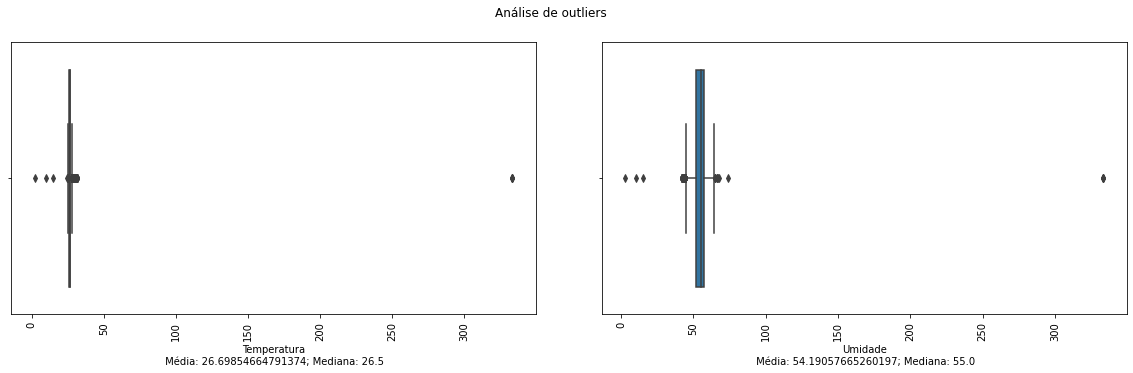

CPU times: user 283 ms, sys: 102 ms, total: 386 ms
Wall time: 268 ms


In [76]:
%%time
fig, axes = plt.subplots(1, 2, figsize = (20,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Análise de outliers')

#Temperatura - Boxplot
sns.boxplot(ax=axes[0],x=df_dados_api['temp_ar'])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Temperatura\n Média: ' + str(df_dados_api['temp_ar'].mean()) + '; Mediana: ' + str(df_dados_api['temp_ar'].median()))

#Umidade - Boxplot
sns.boxplot(ax=axes[1],x=df_dados_api['umid_ar'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Umidade\n Média: ' + str(df_dados_api['umid_ar'].mean()) + '; Mediana: ' + str(df_dados_api['umid_ar'].median()))

plt.show();

Excluindo outliers

In [77]:
def limites_outliers(coluna):
  Q1 = coluna.quantile(.25)
  Q3 = coluna.quantile(.75)
  IIQ = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IIQ
  limite_superior = Q3 + 1.5 * IIQ
  return limite_inferior, limite_superior

In [78]:
limite_inferior_temp_ar, limite_superior_temp_ar = limites_outliers(df_dados_api['temp_ar'])
limite_inferior_umid_ar, limite_superior_umid_ar = limites_outliers(df_dados_api['umid_ar'])

In [79]:
selecao_temp_ar = (df_dados_api['temp_ar'] >= limite_inferior_temp_ar) & (df_dados_api['temp_ar'] <= limite_superior_temp_ar)
df_dados_api = df_dados_api[selecao_temp_ar]

In [80]:
selecao_umid_ar = (df_dados_api['umid_ar'] >= limite_inferior_umid_ar) & (df_dados_api['umid_ar'] <= limite_superior_umid_ar)
df_dados_api = df_dados_api[selecao_umid_ar]

Revendo boxplots

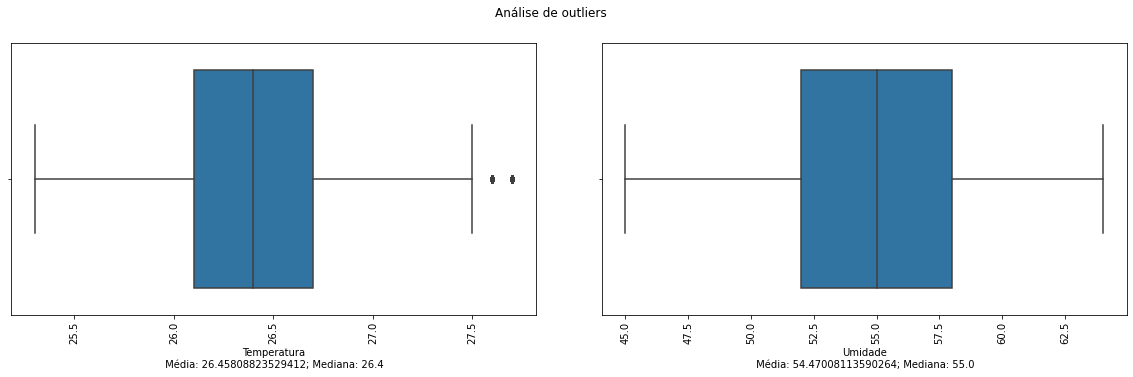

CPU times: user 455 ms, sys: 108 ms, total: 563 ms
Wall time: 447 ms


In [81]:
%%time
fig, axes = plt.subplots(1, 2, figsize = (20,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Análise de outliers')

#Temperatura - Boxplot
sns.boxplot(ax=axes[0],x=df_dados_api['temp_ar'])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Temperatura\n Média: ' + str(df_dados_api['temp_ar'].mean()) + '; Mediana: ' + str(df_dados_api['temp_ar'].median()))

#Umidade - Boxplot
sns.boxplot(ax=axes[1],x=df_dados_api['umid_ar'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Umidade\n Média: ' + str(df_dados_api['umid_ar'].mean()) + '; Mediana: ' + str(df_dados_api['umid_ar'].median()))

plt.show();

Agora as curvas de densidade das variáveis

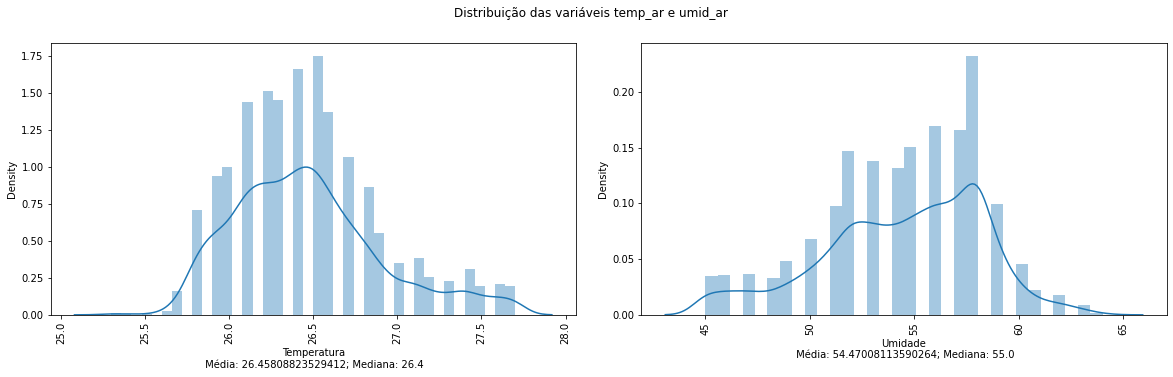

CPU times: user 605 ms, sys: 250 ms, total: 854 ms
Wall time: 619 ms


In [82]:
%%time
fig, axes = plt.subplots(1, 2, figsize = (20,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição das variáveis temp_ar e umid_ar')

#Temperatura - distplot
sns.distplot(ax=axes[0],x=df_dados_api['temp_ar'])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Temperatura\n Média: ' + str(df_dados_api['temp_ar'].mean()) + '; Mediana: ' + str(df_dados_api['temp_ar'].median()))

#Umidade - distplot
sns.distplot(ax=axes[1],x=df_dados_api['umid_ar'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Umidade\n Média: ' + str(df_dados_api['umid_ar'].mean()) + '; Mediana: ' + str(df_dados_api['umid_ar'].median()))

plt.show();

Testando se as distruições são normais

In [110]:
%%time
stat_temp_ar,p_temp_ar = stats.shapiro(df_dados_api['temp_ar'].to_numpy())
stat_umid_ar,p_umid_ar = stats.shapiro(df_dados_api['umid_ar'].to_numpy())

CPU times: user 3.28 ms, sys: 0 ns, total: 3.28 ms
Wall time: 3.38 ms


In [111]:
print(f'p-value temp_ar: {p_temp_ar:.5f}')
print(f'p-value umid_ar: {p_umid_ar:.5f}')

p-value temp_ar: 0.00000
p-value umid_ar: 0.00000


Com os p_values < 0.5, logo curvas não normais.

# Tratando data

Copiando dataframe para uma nova variável

In [87]:
dados_projeto = df_dados_api.copy()
dados_projeto

,temp_ar,umid_ar,time.data,time.hora
0,26.70,52.00,"25/03/2023,",11:07:05
1,26.70,52.00,"25/03/2023,",11:06:23
2,26.70,52.00,"25/03/2023,",11:05:41
3,26.70,52.00,"25/03/2023,",11:04:59
4,26.70,52.00,"25/03/2023,",11:04:17
...,...,...,...,...
8496,27.30,55.00,"02/03/2023,",08:27:55
8497,27.10,54.00,"02/03/2023,",08:22:52
8498,26.90,55.00,"02/03/2023,",08:17:50
8499,26.70,61.00,"02/03/2023,",08:07:40


Removendo virgula de time.data e concatenando com time.hora para gerar data no formato datetime

In [88]:
def converte_data_portugues_para_ingles(df):
  return datetime.strptime(df['time.data'], "%d/%m/%Y").strftime("%Y-%m-%d");

In [89]:
dados_projeto['time.data'] = dados_projeto['time.data'].str.replace(',','')
dados_projeto['time.data'] = dados_projeto.apply(lambda x: converte_data_portugues_para_ingles(x), axis=1)
dados_projeto['data'] = dados_projeto['time.data'] + ' ' + dados_projeto['time.hora']
dados_projeto['data'] = dados_projeto['data'].astype('datetime64[ns]')
dados_projeto.head()

,temp_ar,umid_ar,time.data,time.hora,data
0,26.70,52.00,2023-03-25,11:07:05,2023-03-25 11:07:05
1,26.70,52.00,2023-03-25,11:06:23,2023-03-25 11:06:23
2,26.70,52.00,2023-03-25,11:05:41,2023-03-25 11:05:41
3,26.70,52.00,2023-03-25,11:04:59,2023-03-25 11:04:59
4,26.70,52.00,2023-03-25,11:04:17,2023-03-25 11:04:17


In [90]:
dados_projeto.tail()

,temp_ar,umid_ar,time.data,time.hora,data
8496,27.30,55.00,2023-03-02,08:27:55,2023-03-02 08:27:55
8497,27.10,54.00,2023-03-02,08:22:52,2023-03-02 08:22:52
8498,26.90,55.00,2023-03-02,08:17:50,2023-03-02 08:17:50
8499,26.70,61.00,2023-03-02,08:07:40,2023-03-02 08:07:40
8500,26.60,61.00,2023-03-02,08:02:36,2023-03-02 08:02:36


In [91]:
dados_projeto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7888 entries, 0 to 8500
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   temp_ar    7888 non-null   float64       
 1   umid_ar    7888 non-null   float64       
 2   time.data  7888 non-null   object        
 3   time.hora  7888 non-null   object        
 4   data       7888 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 369.8+ KB


Verificando nulos novamente

In [92]:
df_dados_api.isnull().sum()

temp_ar      0
umid_ar      0
time.data    0
time.hora    0
dtype: int64

Visualizando contagem de registros agrupados por dia

In [93]:
dados_projeto.groupby(by="time.data").count()

,temp_ar,umid_ar,time.hora,data
time.data,,,,
2023-03-02,102,102,102,102
2023-03-03,282,282,282,282
2023-03-04,285,285,285,285
2023-03-05,286,286,286,286
2023-03-06,285,285,285,285
2023-03-07,284,284,284,284
2023-03-08,271,271,271,271
2023-03-09,286,286,286,286
2023-03-10,239,239,239,239


Deletando colunas que não vamos usar mais

In [94]:
del dados_projeto['time.data']
del dados_projeto['time.hora']

In [95]:
dados_projeto.head()

,temp_ar,umid_ar,data
0,26.70,52.00,2023-03-25 11:07:05
1,26.70,52.00,2023-03-25 11:06:23
2,26.70,52.00,2023-03-25 11:05:41
3,26.70,52.00,2023-03-25 11:04:59
4,26.70,52.00,2023-03-25 11:04:17


In [96]:
dados_projeto.tail()

,temp_ar,umid_ar,data
8496,27.30,55.00,2023-03-02 08:27:55
8497,27.10,54.00,2023-03-02 08:22:52
8498,26.90,55.00,2023-03-02 08:17:50
8499,26.70,61.00,2023-03-02 08:07:40
8500,26.60,61.00,2023-03-02 08:02:36


# Filtro por período a partir do dia 04/03/2023

In [97]:
filtro = (dados_projeto.data >= '2023-03-04 00:00:00') & (dados_projeto.data <= '2023-03-26 00:00:00')
serie = dados_projeto.loc[filtro]
serie

,temp_ar,umid_ar,data
0,26.70,52.00,2023-03-25 11:07:05
1,26.70,52.00,2023-03-25 11:06:23
2,26.70,52.00,2023-03-25 11:05:41
3,26.70,52.00,2023-03-25 11:04:59
4,26.70,52.00,2023-03-25 11:04:17
...,...,...,...
8023,26.60,57.00,2023-03-04 00:24:21
8024,26.60,57.00,2023-03-04 00:19:18
8025,26.60,57.00,2023-03-04 00:14:16
8026,26.60,58.00,2023-03-04 00:09:14


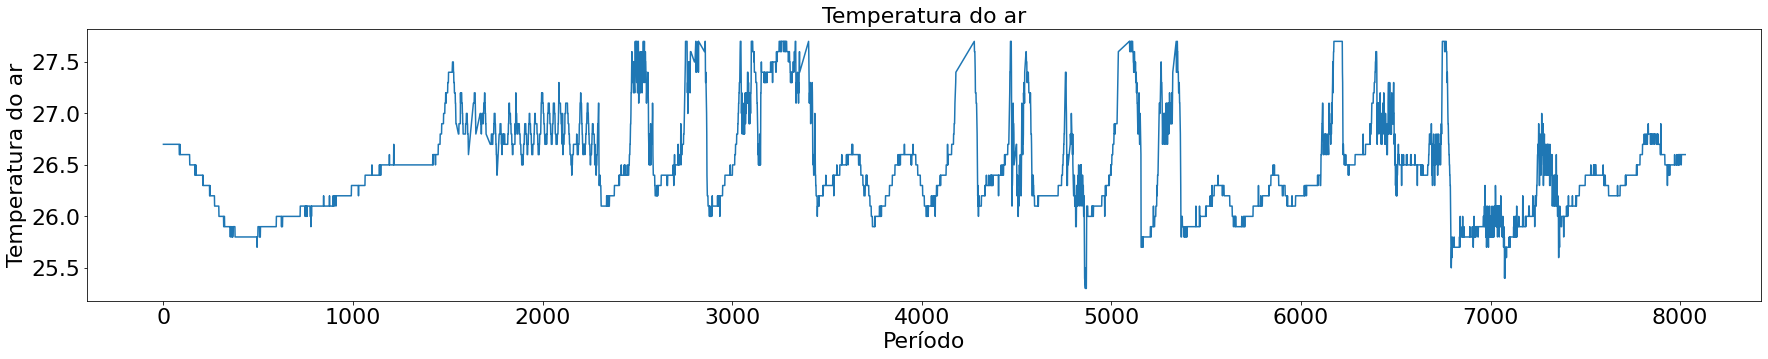

CPU times: user 451 ms, sys: 110 ms, total: 561 ms
Wall time: 455 ms


In [98]:
%%time
plt.figure(figsize=(30,5))
serie.temp_ar.plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Período',size=22)
plt.ylabel('Temperatura do ar',size=22)
plt.title('Temperatura do ar',size=22)

plt.savefig('data_temp_ar_conjunto_tratado_original.png', facecolor='white', transparent=False)  
plt.show() 
plt.close()

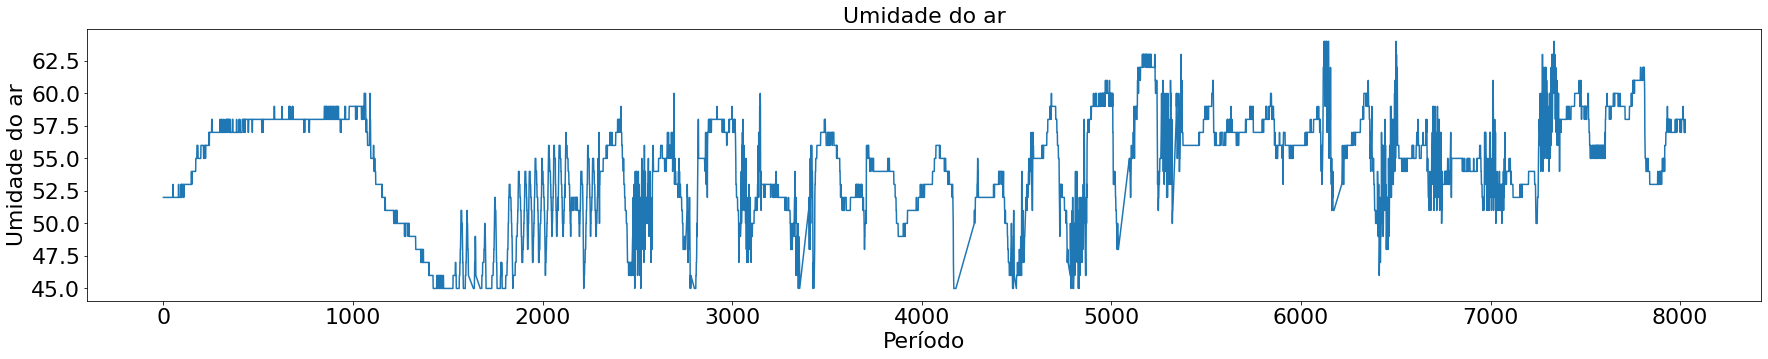

CPU times: user 494 ms, sys: 111 ms, total: 605 ms
Wall time: 496 ms


In [99]:
%%time
plt.figure(figsize=(30,5))
serie.umid_ar.plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Período',size=22)
plt.ylabel('Umidade do ar',size=22)
plt.title('Umidade do ar',size=22)

plt.savefig('data_umidade_ar_conjunto_tratado_original.png', facecolor='white', transparent=False)  
plt.show() 
plt.close()

# Agrupando dados a cada t minuto(s) utilizando a média

Definindo os minutos

In [100]:
minutos = 30

Setando a data como index

In [101]:
serie.set_index('data', inplace=True)

In [102]:
serie

,temp_ar,umid_ar
data,,
2023-03-25 11:07:05,26.70,52.00
2023-03-25 11:06:23,26.70,52.00
2023-03-25 11:05:41,26.70,52.00
2023-03-25 11:04:59,26.70,52.00
2023-03-25 11:04:17,26.70,52.00
...,...,...
2023-03-04 00:24:21,26.60,57.00
2023-03-04 00:19:18,26.60,57.00
2023-03-04 00:14:16,26.60,57.00


Agrupando os valores de data para cada t minuto(s) pela média

In [103]:
%%time
dados_agrupados_minutos = serie.resample(str(minutos) + 'T').mean()
dados_agrupados_minutos.head()

CPU times: user 5.78 ms, sys: 0 ns, total: 5.78 ms
Wall time: 10.5 ms


,temp_ar,umid_ar
data,,
2023-03-04 00:00:00,26.60,57.17
2023-03-04 00:30:00,26.60,58.00
2023-03-04 01:00:00,26.60,58.00
2023-03-04 01:30:00,26.58,57.60
2023-03-04 02:00:00,26.60,57.83


Tamanho do conjunto gerado

In [104]:
dados_agrupados_minutos.shape

(1031, 2)

Verificando nulos

In [105]:
dados_agrupados_minutos.isnull().sum()

temp_ar    59
umid_ar    59
dtype: int64

Preenchendo nulos com os valores anteriores

In [106]:
dados_agrupados_minutos.fillna(method="ffill", inplace = True)

Verificando novamente os nulos

In [107]:
dados_agrupados_minutos.isnull().sum()

temp_ar    0
umid_ar    0
dtype: int64

# Gráficos

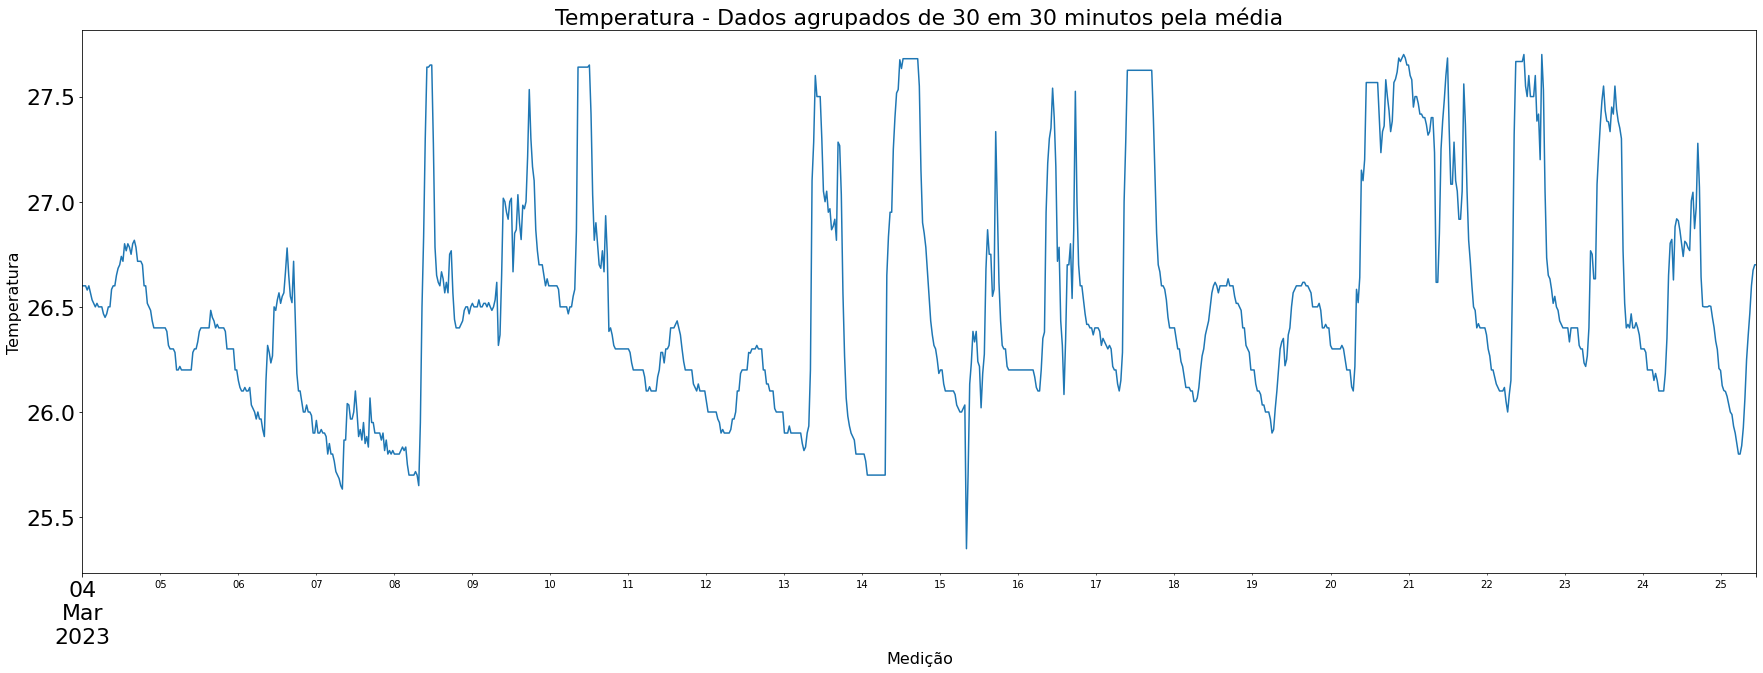

CPU times: user 678 ms, sys: 118 ms, total: 796 ms
Wall time: 712 ms


In [108]:
%%time
plt.figure(figsize=(30,10))
dados_agrupados_minutos['temp_ar'].plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Medição',size=16)
plt.ylabel('Temperatura',size=16)
plt.title(f'Temperatura - Dados agrupados de {minutos} em {minutos} minutos pela média',size=22)

plt.savefig(f'data_temperatura_ar_conjunto_dados_agrupados_{minutos}_minutos.png', facecolor='white', transparent=False)  
plt.show() 
plt.close()

plt.show()

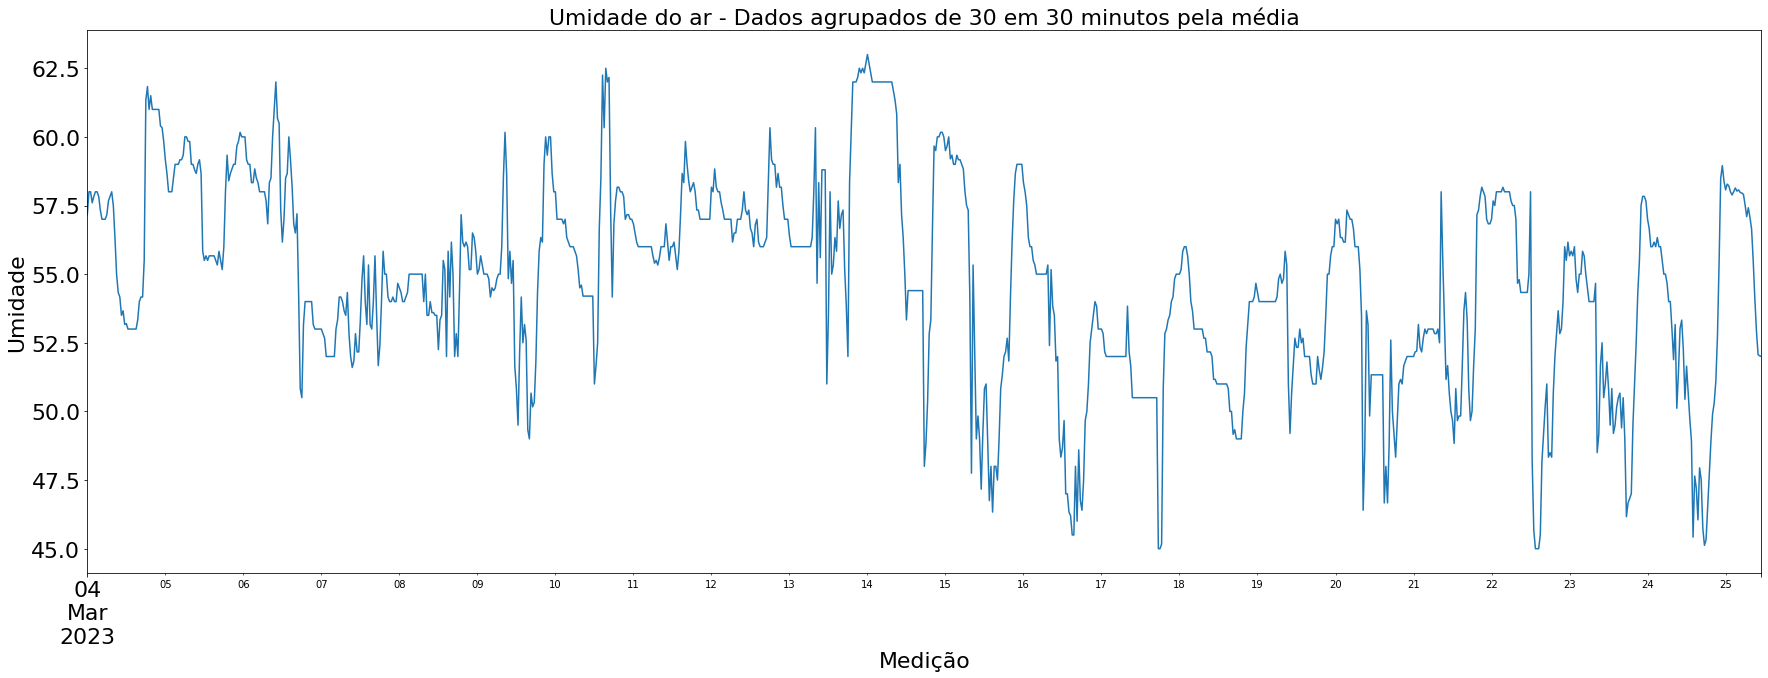

CPU times: user 714 ms, sys: 123 ms, total: 838 ms
Wall time: 725 ms


In [109]:
%%time
plt.figure(figsize=(30,10))
dados_agrupados_minutos['umid_ar'].plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Medição',size=22)
plt.ylabel('Umidade',size=22)
plt.title(f'Umidade do ar - Dados agrupados de {minutos} em {minutos} minutos pela média',size=22)

plt.savefig(f'data_umidade_ar_conjunto_dados_agrupados_{minutos}_minutos.png', facecolor='white', transparent=False)  
plt.show() 
plt.close()

plt.show()